In [1]:
#Importing all important things 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df= pd.read_csv('data/cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [6]:
df.drop(columns=['RISK_MM','Date','Location'],inplace=True)

In [7]:
# here we change the data type for these two column
df['RainTomorrow']=df['RainTomorrow'].astype('category')
df['RainToday']=df['RainToday'].astype('category')

In [8]:
# here we transform them to numeric values.
df['RainTomorrow']=df['RainTomorrow'].cat.codes
df['RainToday']=df['RainToday'].cat.codes

In [9]:
 # Identifying number of row and columns .
df.shape

(142193, 18)

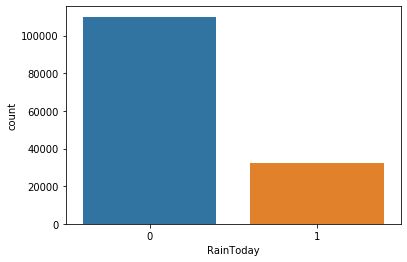

In [10]:
sns.countplot(df['RainToday'])

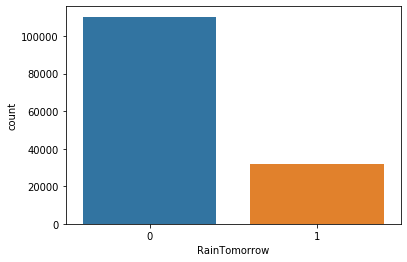

In [11]:
sns.countplot(df['RainTomorrow'])

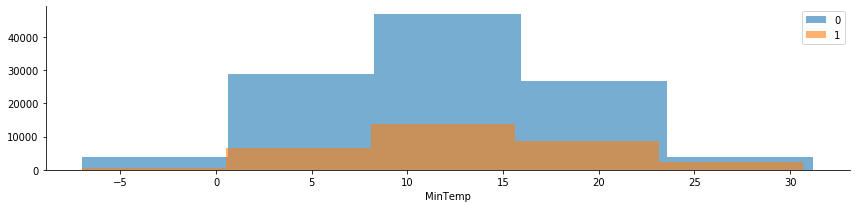

In [12]:
g = sns.FacetGrid(df,hue='RainTomorrow',aspect=4)
g.map(plt.hist,'MinTemp',alpha=0.6,bins=5)
plt.legend()

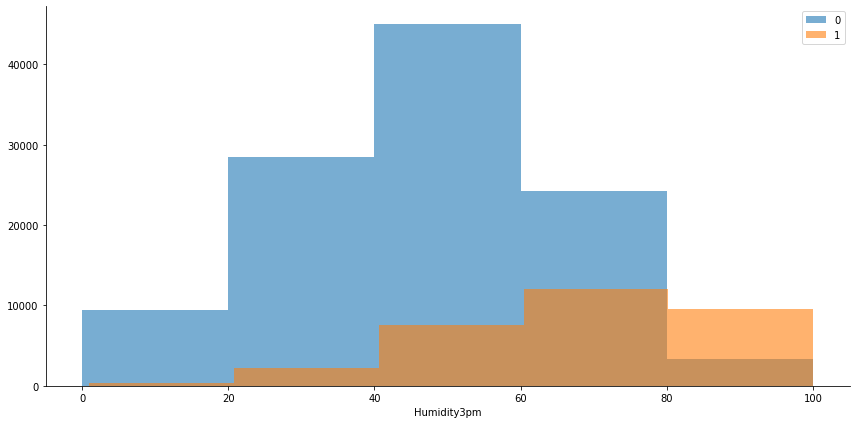

In [13]:
g = sns.FacetGrid(df,hue='RainTomorrow',height=6,aspect=2)
g.map(plt.hist,'Humidity3pm',alpha=0.6,bins=5)
plt.legend()

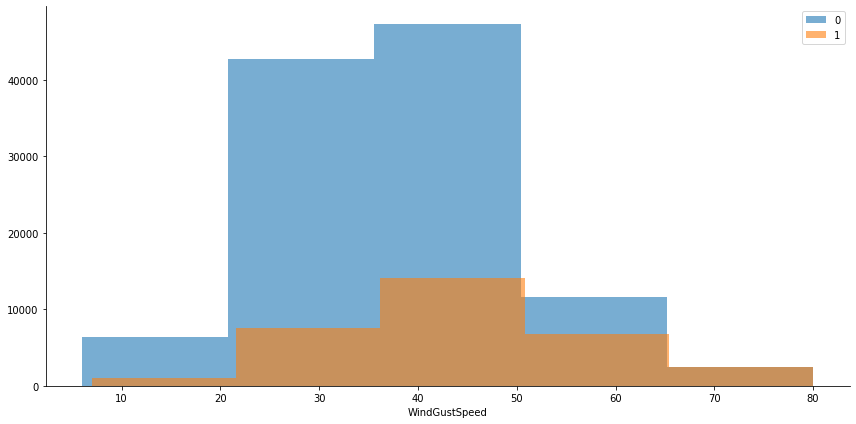

In [14]:
g = sns.FacetGrid(df,hue='RainTomorrow',height=6,aspect=2)
g.map(plt.hist,'WindGustSpeed',alpha=0.6,bins=5)
plt.legend()

In [15]:
#select the columns for the model.
X=df.iloc[:,:16]

In [16]:
X.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


In [17]:
# select our target .
y=df['RainTomorrow']

In [18]:
# here we transform the non_numeric features to make the model dealing with it . 
X=pd.get_dummies(X,columns=['WindDir9am','WindDir3pm','WindGustDir'],drop_first=True)

In [19]:
#Next, we split 75% of the data to the training set while 25% of the data to test set using below code.
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0,stratify=y)

In [20]:
#we need to bring all features to the same level of magnitudes. This can be achieved by a method called feature scaling.
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X.iloc[4:10]

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
4,0.000028,0.641361,0.713615,0.036232,0.472973,0.179487,0.454545,0.795455,0.33,0.795654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.000035,0.565445,0.652582,0.007246,0.675676,0.487179,0.545455,0.488636,0.23,0.784019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000042,0.557592,0.542254,0.000000,0.594595,0.512821,0.545455,0.420455,0.19,0.786927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.000049,0.384817,0.582160,0.000000,0.391892,0.153846,0.386364,0.409091,0.19,0.814561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.000056,0.437173,0.704225,0.000000,1.000000,0.179487,0.636364,0.340909,0.09,0.781837,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000063,0.526178,0.661972,0.050725,0.297297,0.384615,0.250000,0.522727,0.27,0.768020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
#FOR K = 5
#Our next step is to K-NN model and train it with the training data. Here n_neighbors is the value of factor K.
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
# Let's train our test data and check its accuracy.
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8257616247995724


In [23]:
# let's see the classification report .
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     27580
           1       0.70      0.39      0.50      7969

    accuracy                           0.83     35549
   macro avg       0.77      0.67      0.70     35549
weighted avg       0.81      0.83      0.81     35549



In [24]:
#let's show the confusion matrix.
confusion_matrix(y_test,y_test_pred)

array([[26278,  1302],
       [ 4892,  3077]], dtype=int64)

In [25]:
#For K=8
classifier = KNeighborsClassifier(n_neighbors = 8, p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [26]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8206700610425047


In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27580
           1       0.78      0.28      0.41      7969

    accuracy                           0.82     35549
   macro avg       0.80      0.63      0.65     35549
weighted avg       0.81      0.82      0.79     35549



In [ ]:
#Accuracy is 82.1 when k = 8 